In [19]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image, ImageOps

In [20]:
os.listdir('/content/drive/MyDrive/archive (10)')

['Training', 'Testing']

In [21]:
training_path = '/content/drive/MyDrive/archive (10)/Training'
os.listdir(training_path)

['pituitary', 'glioma', 'notumor', 'meningioma']

In [22]:
testing_path = '/content/drive/MyDrive/archive (10)/Training'
os.listdir(testing_path)

['pituitary', 'glioma', 'notumor', 'meningioma']

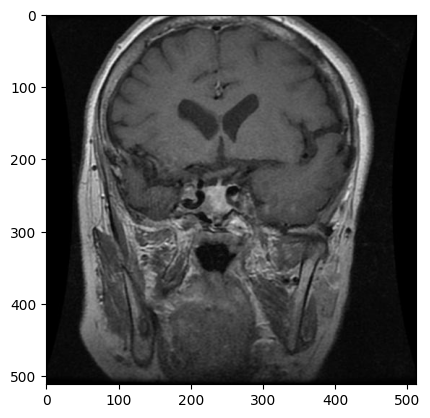

In [23]:
pituitary_img = training_path + '/pituitary'
pituitary_img = pituitary_img + '/Tr-pi_0451.jpg'
plt.imshow(plt.imread(pituitary_img))

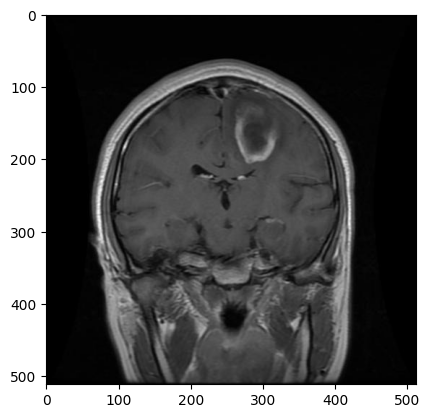

In [24]:
glioma_img = training_path + '/glioma'
glioma_img = glioma_img + '/Tr-gl_0100.jpg'
plt.imshow(plt.imread(glioma_img))

In [25]:
no_tumor_img = training_path + '/notumor'
no_tumor_img = no_tumor_img + '/Tr-no_0612.jpg'


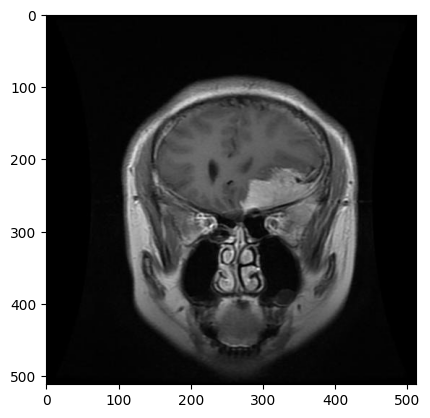

In [26]:
menigioma_img = training_path + '/meningioma' + '/Tr-meTr_0000.jpg'
plt.imshow(plt.imread(menigioma_img))

In [27]:
h = []
w = []
for file_dir in os.listdir(training_path):
  for image_dir in os.listdir(training_path + '/' + file_dir):
    image = plt.imread(training_path + '/' + file_dir + '/' + image_dir)
    (height, width) = image.shape[:2]
    h.append(height)
    w.append(width)



In [28]:
np.mean(h)

453.9853198182454

In [29]:
np.mean(w)

451.66882209017825

In [30]:
img_shape = (450, 450, 3)

In [31]:
from tensorflow import keras

In [32]:
from keras.preprocessing.image import ImageDataGenerator

In [33]:
image_gen = tf.keras.preprocessing.image.ImageDataGenerator(zoom_range=0.1, shear_range=0.1, rotation_range = 10, height_shift_range=0.1, width_shift_range=0.1)

In [34]:
training_path = '/content/drive/MyDrive/archive (10)/Training'

In [35]:
train_image_gen = image_gen.flow_from_directory(training_path, target_size=img_shape[:2], class_mode='categorical', batch_size=32)

Found 5722 images belonging to 4 classes.


In [36]:
test_image_gen = image_gen.flow_from_directory(testing_path, target_size=img_shape[:2], class_mode='categorical', batch_size=32)

Found 5722 images belonging to 4 classes.


In [37]:
test_image_gen.class_indices

{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

In [38]:
train_image_gen.class_indices

{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

In [39]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

In [40]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=img_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dense(32, activation='relu'))

model.add(Dense(4, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 448, 448, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 224, 224, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 222, 222, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 111, 111, 64)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 109, 109, 128)     73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 54, 54, 128)      0

In [42]:
model.fit(train_image_gen, epochs=20, validation_data=test_image_gen)


Epoch 1/20
179/179 [==============================] - 554s 3s/step - loss: 6.0362 - accuracy: 0.5897 - val_loss: 0.7241 - val_accuracy: 0.7162
Epoch 2/20
179/179 [==============================] - 529s 3s/step - loss: 0.7360 - accuracy: 0.7080 - val_loss: 0.7101 - val_accuracy: 0.7274
Epoch 3/20
179/179 [==============================] - 507s 3s/step - loss: 0.6683 - accuracy: 0.7379 - val_loss: 0.6870 - val_accuracy: 0.7183
Epoch 4/20
179/179 [==============================] - 500s 3s/step - loss: 0.6499 - accuracy: 0.7506 - val_loss: 0.6192 - val_accuracy: 0.7644
Epoch 5/20
179/179 [==============================] - 475s 3s/step - loss: 0.5841 - accuracy: 0.7821 - val_loss: 0.5491 - val_accuracy: 0.7842
Epoch 6/20
179/179 [==============================] - 483s 3s/step - loss: 0.5344 - accuracy: 0.7936 - val_loss: 0.5379 - val_accuracy: 0.7912
Epoch 7/20
179/179 [==============================] - 481s 3s/step - loss: 0.4919 - accuracy: 0.8182 - val_loss: 0.4476 - val_accuracy: 0.8376

In [ ]:
model.evaluate(test_image_gen)

179/179 [==============================] - 88s 492ms/step - loss: 0.3048 - accuracy: 0.8909


[0.3047769367694855, 0.8909472227096558]

In [ ]:
train_image_gen.class_indices

NameError: ignored

In [ ]:
model.save('tumor_type_model.h5')

In [ ]:
p_img = '/content/download (4).jpg'

In [ ]:
sample_pit_img = cv2.imread(p_img)

# Convert the image to grayscale
gray_img = cv2.cvtColor(sample_pit_img, cv2.COLOR_BGR2GRAY)

# Resize the image to the desired shape (450 x 450)

gray_img_resized = cv2.resize(gray_img, img_shape[:2])

# Expand dimensions to match the desired shape (1, 450, 450, 1)
gray_img_final = np.expand_dims(gray_img_resized, axis=0)
gray_img_final = np.expand_dims(gray_img_final, axis=-1)

# Print the shape of the resulting grayscale image
print(gray_img_final.shape)

(1, 450, 450, 1)


In [ ]:
predictions = model.predict(gray_img_final)

1/1 [==============================] - 0s 19ms/step


In [ ]:
predictions

array([[0.30972603, 0.3713821 , 0.20611846, 0.11277339]], dtype=float32)

In [ ]:
max = np.argmax(predictions)
max

1

In [ ]:
for key in train_image_gen.class_indices:
  if train_image_gen.class_indices[key] == max:
    final_pred = key





In [ ]:
train_image_gen.class_indices

{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

In [ ]:
print("You have", final_pred)

You have meningioma


In [ ]:
model.fit(train_image_gen, epochs=5, validation_split=0.2, validation_data=test_image_gen)

Epoch 1/5
179/179 [==============================] - 156s 872ms/step - loss: 0.2585 - accuracy: 0.9002 - val_loss: 0.2562 - val_accuracy: 0.9021
Epoch 2/5
179/179 [==============================] - ETA: 0s - loss: 0.2783 - accuracy: 0.8971

KeyboardInterrupt: ignored

In [ ]:
model = tf.keras.models.load_model('/content/tumor_type_model.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 448, 448, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 224, 224, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 222, 222, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 111, 111, 64)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 109, 109, 128)     73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 54, 54, 128)      0

1/1 [==============================] - 8s 8s/step
notumor


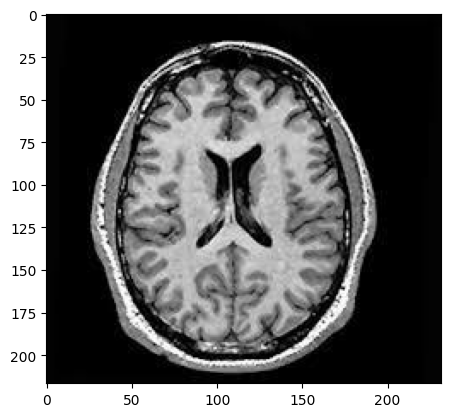

In [5]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
import random
from PIL import Image, ImageOps
testing_path = '/content/drive/MyDrive/archive (10)/Testing'
model = tf.keras.models.load_model('/content/tumor_type_model.h5')
img_shape = (450, 450)
glioma_dir = os.path.join(testing_path, 'notumor')
image_files = os.listdir(glioma_dir)
random_image_file = random.choice(image_files)
img_dir = os.path.join(glioma_dir, random_image_file)
sample_img = cv2.imread(img_dir)
sp_img = cv2.cvtColor(sample_img, cv2.COLOR_BGR2GRAY)
resize_sample_img = cv2.resize(sp_img, img_shape)
img_final = np.expand_dims(resize_sample_img, axis=0)
img_final_final = np.expand_dims(img_final, axis=-1)
preds = model.predict(img_final_final)
max_preds = np.argmax(preds)
for key in {'glioma/meningioma': 0, 'glioma/meningioma': 1, 'notumor': 2, 'pituitary': 3}:
  if {'glioma/meningioma': 0, 'glioma/meningioma': 1, 'notumor': 2, 'pituitary': 3}[key] == max_preds:
    final_pred = key

plt.imshow(sample_img)
print(final_pred)




In [17]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  for gpu in gpus:
    try:
      tf.config.experimental.set_memory_growth(gpu, True)
      logical_gpus = tf.config.experimental.list_logical_devices('GPU')
      print(len(gpus), "Physical GPUs", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
      print(e)

Physical devices cannot be modified after being initialized


In [18]:
model.fit(train_image_gen, epochs=10, validation_data = test_image_gen)

Epoch 1/10


InternalError: ignored